In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [112]:
dataset=pd.read_excel("HousePricePrediction.xlsx")
print(dataset.head())

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [113]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [114]:
dataset.shape

(2919, 13)

In [115]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


<Axes: >

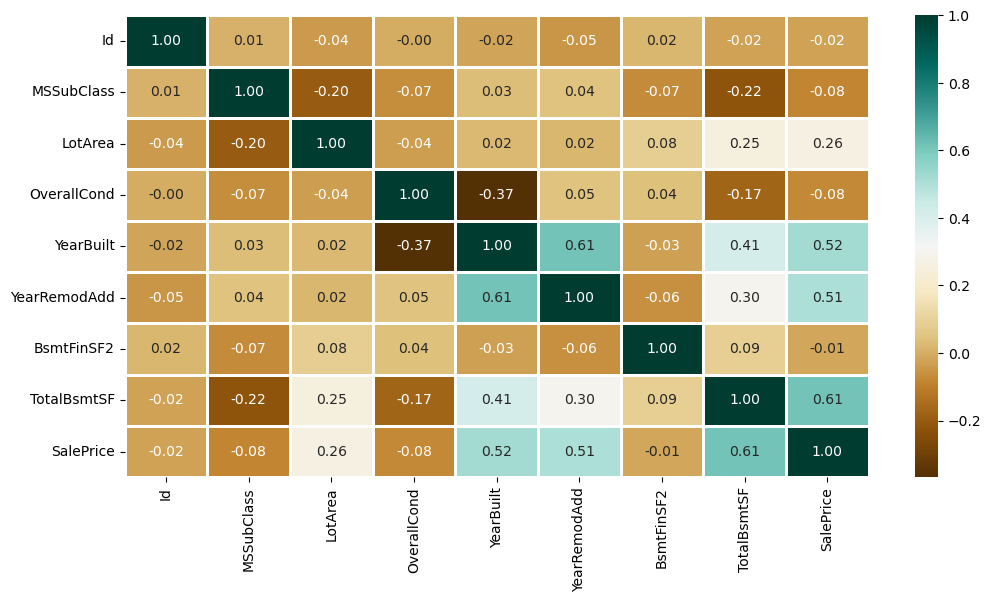

In [116]:
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

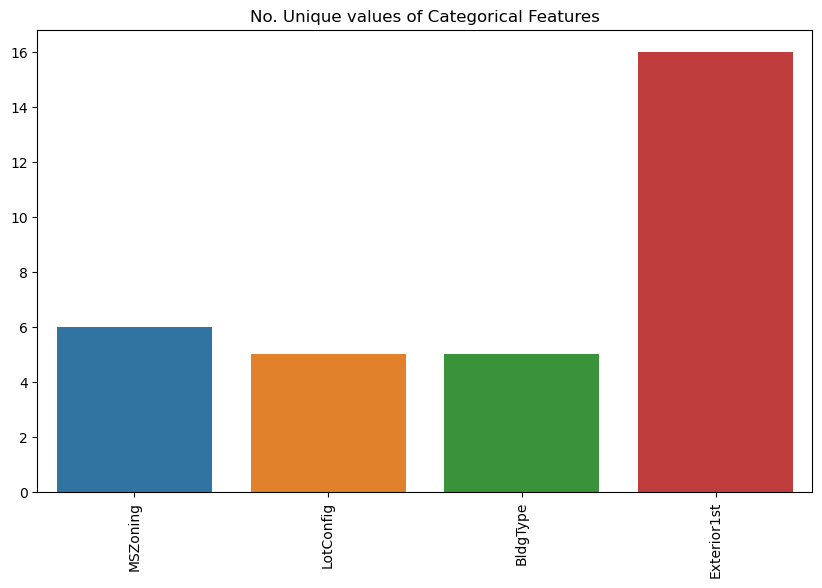

In [117]:

unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

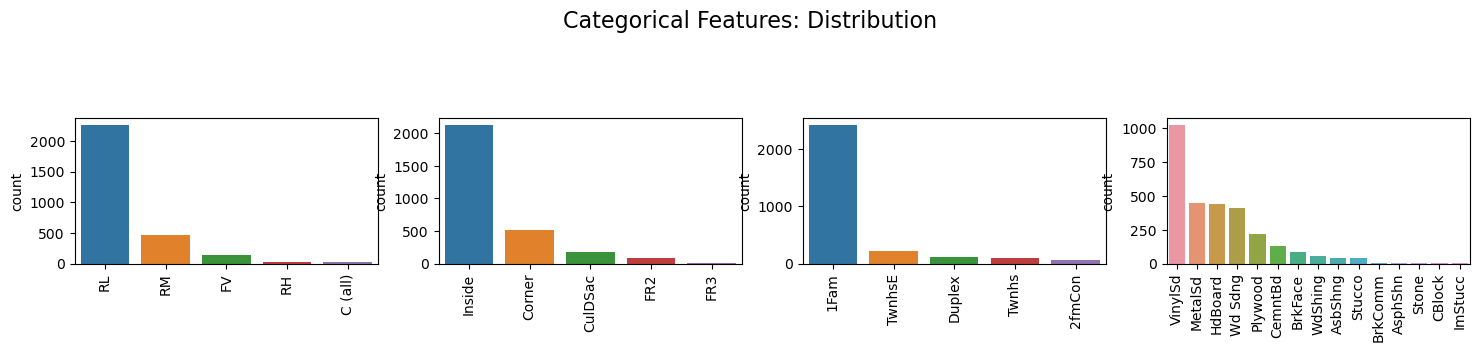

In [118]:
plt.figure(figsize=(18, 36))
plt.suptitle('Categorical Features: Distribution', y=0.91, fontsize=16)  # Adjust y position and font size
plt.subplots_adjust(hspace=0.8)
index=1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

plt.show()

In [119]:
dataset.drop(['Id'],axis=1,inplace=True)

In [120]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

In [121]:
new_dataset = dataset.dropna()
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [122]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [123]:
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)







In [124]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']
 
# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [125]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18741683841599951


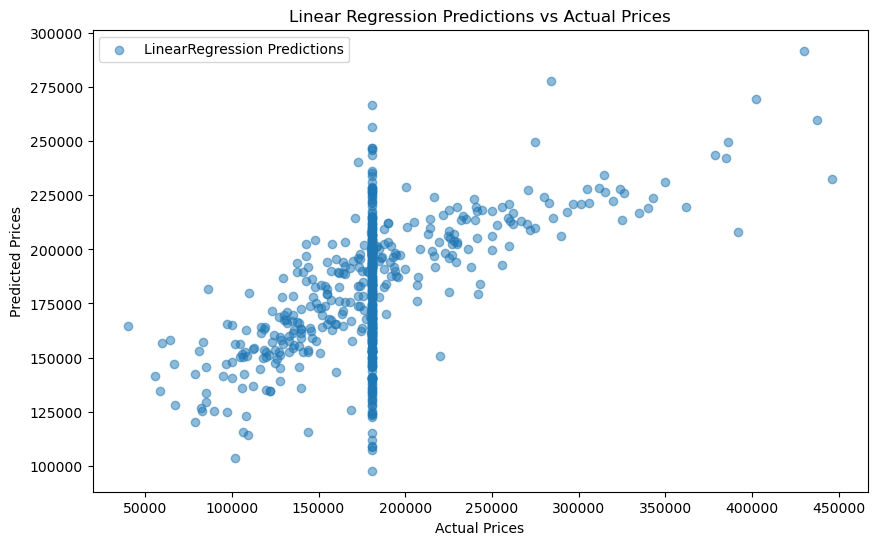

      predicted_values  original_values
1728     191650.159234     180921.19589
2689     256694.212040     180921.19589
1151     172701.860417     149900.00000
2762     178271.406358     180921.19589
1180     206419.736135     250000.00000
2223     197732.891018     180921.19589
553      122841.483758     108000.00000
104      157878.589347     169500.00000
1190     191291.778879     168000.00000
2308     204804.033084     180921.19589
2094     150243.640276     180921.19589
22       219384.081530     230000.00000
1801     175255.505753     180921.19589
874      146897.114200      66500.00000
2328     199206.878020     180921.19589
1332     140385.690333     100000.00000
1818     168183.444475     180921.19589
298      163859.736462     175000.00000
762      199489.974672     215200.00000
2479     197189.642217     180921.19589


In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_valid, Y_pred, label='LinearRegression Predictions', alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression Predictions vs Actual Prices')
plt.legend()
plt.show()

predicted_df_lr = {'predicted_values': Y_pred, 'original_values': Y_valid}
df_lr = pd.DataFrame(predicted_df_lr).head(20)
print(df_lr)
